#### Gaussian
#### Canny
#### Hough

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab import files
# please upload the chess_board.jpg image here
uploaded = files.upload()

Saving Chess_board.jpg to Chess_board (2).jpg


In [ ]:
# get image name
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Chess_board.jpg" with length 128887 bytes


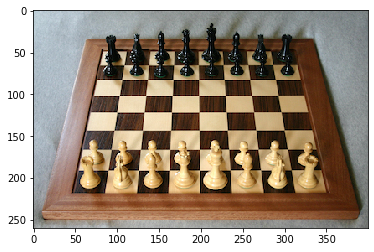

In [ ]:
# get image
# Load in Grayscale
img = cv2.imread(fn)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Gaussian

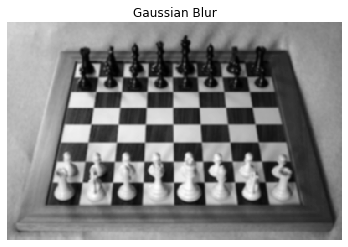

In [ ]:
# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
blur = cv2.GaussianBlur(gray, ksize=(5,5), sigmaX=0)
plt.figure(),plt.imshow(blur,cmap='gray'),plt.title('Gaussian Blur'),plt.axis('off')
plt.show()

Q1. In the GaussianBlur function call, we set sigmaX=0.  What is the actual sigma being applied in the actual convolution?  Add your answer to the next text block.

#Answer-1
If sigmaY is not defined, sigmaY=0 when sigmasX=0. When both are zeros, they are computed from ksize.width and ksize.height based on sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8. <br/> So in Q1, **SigmaX=SigmaY=1.1** are the actual sigma applied to image.

Q2. Replace the Gaussian Filter with bilateralFilter, and rerun the Canny edge detector and HoughLinesP using the bilateral filtered image.

#Answer 2

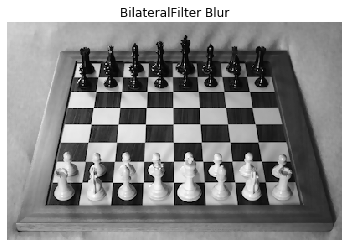

In [ ]:
# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
blur = cv2.bilateralFilter(gray, 5, 10, 10)
plt.figure(),plt.imshow(blur,cmap='gray'),plt.title('BilateralFilter Blur'),plt.axis('off')
plt.show()

Q3.  Comment on the different behavior of BilateralFilter compared to GaussianFilter and and how it might be useful for.

#Answer 3
Gaussian filter is a function including nearby pixels so it doesn't consider if pixels have almost the same intensity or a pixel is an edge pixel or not. So Gaussian filter blurs the edges.

However, Bilateral Filter will keep edges sharp when doing noise removal. Therefore, **Bilateral Filter is more useful and effective than Gaussian Filter to remove the noise for the edge detection.**

# Canny

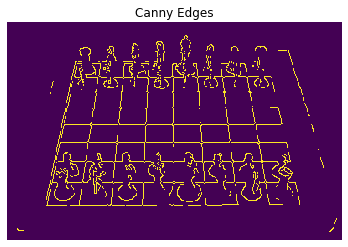

In [ ]:
# Apply edge detection method on the image 
Threshold1 = 250;
Threshold2 = 300;
FilterSize = 5;
edges = cv2.Canny(blur, Threshold1, Threshold2, FilterSize)

plt.figure(),plt.imshow(edges),plt.title('Canny Edges'),plt.axis('off')
plt.show()

Q4. Adjust the Canny edge detector parameters above to achieve the best possible results and reduce computation in your opinion.  You can change the values in the code block above.

#Answer 4
Otsu's Method performs automatic image thresholding.
https://en.wikipedia.org/wiki/Otsu%27s_method 



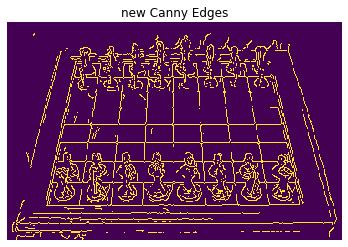

In [ ]:
# Q4. Adjust the parameters for Canny edge
#https://stackoverflow.com/questions/21324950
Threshold2, thresh_im = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
Threshold1 = 0.5*Threshold2
FilterSize = 5;
edges_new = cv2.Canny(blur, Threshold1, Threshold2, FilterSize)

plt.figure(),plt.imshow(edges_new),plt.title('new Canny Edges'),plt.axis('off')
plt.show()

# Hough

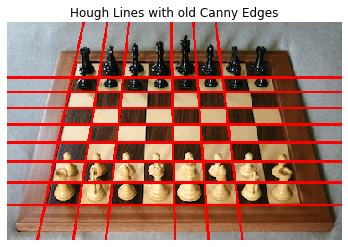

In [ ]:
import math
# Hough returns an array of lines
lines = cv2.HoughLines(edges, rho = 1, theta = 1*np.pi/180, threshold = 100)
N = lines.shape[0]
img_line = img_rgb.copy()
for i in range(N):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))   
    cv2.line(img_line,pt1,pt2,(255,0,0),2)

plt.figure(),plt.imshow(img_line),plt.title('Hough Lines with old Canny Edges'),plt.axis('off')
plt.show()

In [ ]:
print(N, lines)

14 [[[ 1.4300000e+02  1.5707964e+00]]

 [[ 1.2200000e+02  1.5707964e+00]]

 [[ 8.3000000e+01  1.5707964e+00]]

 [[ 1.0200000e+02  1.5707964e+00]]

 [[ 1.6600000e+02  1.5707964e+00]]

 [[ 1.9100000e+02  1.5707964e+00]]

 [[ 2.1800000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  2.0943952e-01]]

 [[-1.9600000e+02  3.1241393e+00]]

 [[ 1.1800000e+02  1.5707964e-01]]

 [[ 6.6000000e+01  1.5707964e+00]]

 [[-2.4700000e+02  3.0194197e+00]]

 [[-2.2200000e+02  3.0717795e+00]]

 [[ 1.4500000e+02  1.0471976e-01]]]


Q5. Add a new code block below to replace HoughLines function with HoughLinesP. Modify the code block to make it work on the same *edges* image.

#Answer 5

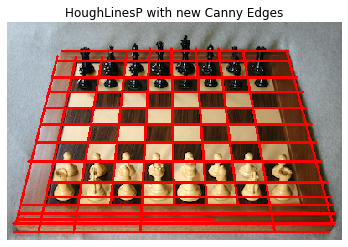

In [ ]:
# HoughLinesP returns an array of lines. Need to assign minLineLength & maxLineGap
lines = cv2.HoughLinesP(edges_new, rho = 1, theta = 1*np.pi/180, threshold = 90, minLineLength = 100, maxLineGap = 100)
N = lines.shape[0]
img_line = img_rgb.copy()
for i in range(N):
    x1 = lines[i][0][0]
    y1 = lines[i][0][1]    
    x2 = lines[i][0][2]
    y2 = lines[i][0][3]    
    cv2.line(img_line,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(),plt.imshow(img_line),plt.title('HoughLinesP with new Canny Edges'),plt.axis('off')
plt.show()